In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

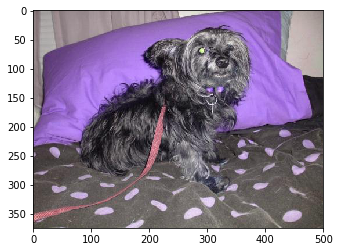

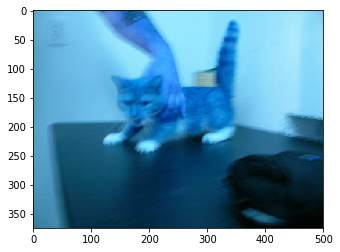

In [4]:
DATASET_DIR = "../__data__/kagglecatsanddogs"
CATEGORIES = [ "Dog", "Cat" ]

def test_directory():
    # show one image from each directory to test paths
    for category in CATEGORIES:
        datadir = os.path.join(DATASET_DIR, category)
        for file in os.listdir(datadir):
            try:
                fileread = cv2.imread(os.path.join(datadir, file), cv2.IMREAD_COLOR)
                plt.imshow(fileread, cmap="gray")
                plt.show()
            except Exception as e:
                print('Error in file:',os.listdir(datadir).index(file), e)
                pass
            break

test_directory()

In [3]:
import random
import pickle

from IPython.display import clear_output

IMG_SIZE_X = 100
IMG_SIZE_Y = 80

training_data = []

def load_training_data():
    # scan each directory to build training dataset
    success = 0
    failed = 0
    for category in CATEGORIES:
        datadir = os.path.join(DATASET_DIR, category)
        label_index = CATEGORIES.index(category)
        for file in os.listdir(datadir):
            try:
                fileread = cv2.imread(os.path.join(datadir, file), cv2.IMREAD_GRAYSCALE)
                fileread = cv2.resize(fileread, (IMG_SIZE_X, IMG_SIZE_Y))
                training_data.append([fileread, label_index])
                success+=1
            except Exception as e:
                clear_output()
                print('Error in file:', category, os.listdir(datadir).index(file), e)
                failed+=1
                pass
    print('Dataset read complete:', success, 'successful', failed, 'failed')
    print(len(training_data), 'images scanned')


def save_dataset(_X, _y):
    X_pickle_out = open('Features.pickle', 'wb')
    pickle.dump(_X, X_pickle_out)
    print('Pickled Features')
    
    y_pickle_out = open('labels.pickle', 'wb')
    pickle.dump(_y, y_pickle_out)
    print('Pickled Labels')
    
    X_pickle_out.close()
    y_pickle_out.close()

In [ ]:
F = []
l = []

def create_training_dataset():
    # load_training_data()

    # shuffle the training data randomly
    for i in range(0, random.randint(0, 5)):
        random.shuffle(training_data)

    # create numpy arrays out of the lists
    for features, label in training_data:
        F.append(features)
        l.append(label)

    _F = np.array(F).reshape(-1, IMG_SIZE_X, IMG_SIZE_Y, 1)
    save_dataset(_F, l)

create_training_dataset()
print(F[1])

In [5]:
X = pickle.load(open('Features.pickle', 'rb'))
y = pickle.load(open('labels.pickle', 'rb'))

print('Loaded training dataset from pickle')

print(X[1])

Loaded training dataset from pickle
[[[255]
  [254]
  [251]
  ...
  [108]
  [108]
  [118]]

 [[116]
  [116]
  [121]
  ...
  [ 72]
  [ 72]
  [ 71]]

 [[ 71]
  [ 71]
  [ 73]
  ...
  [ 72]
  [ 69]
  [ 69]]

 ...

 [[ 62]
  [ 94]
  [144]
  ...
  [ 61]
  [ 72]
  [ 77]]

 [[ 82]
  [ 78]
  [ 82]
  ...
  [ 82]
  [ 89]
  [ 86]]

 [[ 86]
  [104]
  [102]
  ...
  [238]
  [242]
  [248]]]


In [6]:
# Normalize pixel data btw 0 to 1
# Either use keras.utils.Normalize, or
# Simple desi way
# normalized_X = []
# for x in X:
#     normalized_line = []
#     for c in x:
#         normalized_line.append(c/255.0)
#     normalized_X.append(normalized_line)
# X = np.array(normalized_X)

X = X/255.0

print(X[0][0][:3], '\n...\n', X[0][0][-3:])

[[0.16862745]
 [0.17647059]
 [0.11372549]] 
...
 [[0.38431373]
 [0.61176471]
 [0.42352941]]


In [ ]:
# ============================================================================================
# DATASET PREPARATION DONE ------------------------------------------ DATASET PREPARATION DONE
# ============================================================================================

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import MaxPooling2D, Conv2D

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

# Create a Sequential model
model = Sequential()
# Add a INPUT 2D convolutional layer of 64 nodes
model.add( Conv2D(64, (3,3), input_shape = X.shape[1:]) )
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add convolutional layer
model.add( Conv2D(64, (3,3)) )
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten 2D to 1D and Add final dense layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

# Output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [12]:
model.fit(X, y, batch_size=32, validation_split=0.25, epochs=10)
model.save("64x3_CNN.model")

Train on 18709 samples, validate on 6237 samples
Epoch 1/10
18709/18709 [==============================] - 20s 1ms/step - loss: 0.6754 - acc: 0.5760 - val_loss: 0.6644 - val_acc: 0.6037
Epoch 2/10
18709/18709 [==============================] - 19s 1ms/step - loss: 0.6416 - acc: 0.6324 - val_loss: 0.6398 - val_acc: 0.6380
Epoch 3/10
18709/18709 [==============================] - 19s 1ms/step - loss: 0.6095 - acc: 0.6674 - val_loss: 0.6021 - val_acc: 0.6696
Epoch 4/10
18709/18709 [==============================] - 19s 1ms/step - loss: 0.5700 - acc: 0.6954 - val_loss: 0.5964 - val_acc: 0.6838
Epoch 5/10
18709/18709 [==============================] - 19s 1ms/step - loss: 0.5324 - acc: 0.7300 - val_loss: 0.6005 - val_acc: 0.6865
Epoch 6/10
18709/18709 [==============================] - 19s 1ms/step - loss: 0.4823 - acc: 0.7587 - val_loss: 0.6235 - val_acc: 0.6853
Epoch 7/10
18709/18709 [==============================] - 19s 1ms/step - loss: 0.4163 - acc: 0.8026 - val_loss: 0.6714 - val_acc:

In [16]:
model = tf.keras.models.load_model("64x3_CNN.model")

In [17]:
def prediction_image(path):
    fileread = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    fileread = cv2.resize(fileread, (IMG_SIZE_X, IMG_SIZE_Y))
    return fileread.reshape(-1, IMG_SIZE_X, IMG_SIZE_Y, 1)

-------------------------------------------


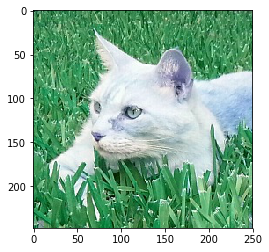

Dog
-------------------------------------------


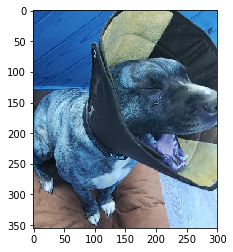

Cat
-------------------------------------------


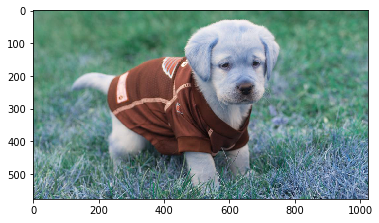

Dog
-------------------------------------------


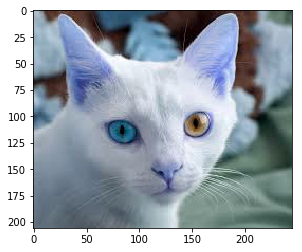

Cat
-------------------------------------------


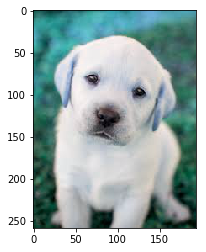

Dog
-------------------------------------------


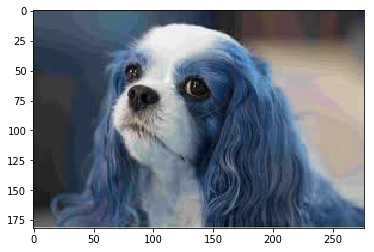

Dog
-------------------------------------------


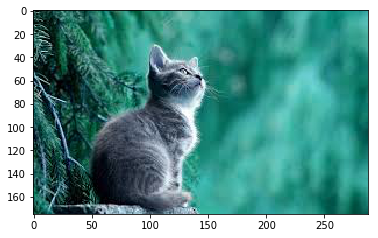

Cat
-------------------------------------------


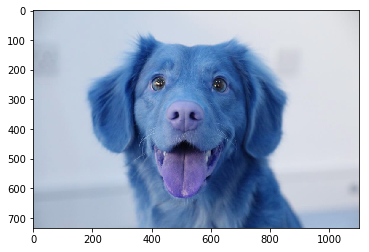

Dog
-------------------------------------------


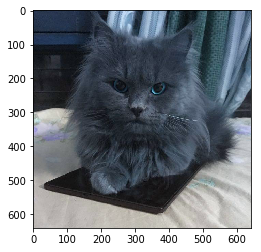

Cat
-------------------------------------------


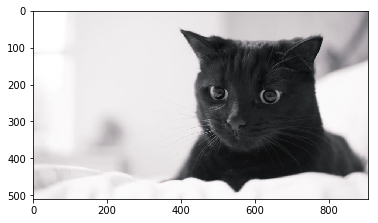

Cat


In [18]:
PR_PATH = 'predict'

for pred in os.listdir(PR_PATH):
    fp = os.path.join(PR_PATH, pred)
    print('-------------------------------------------')
    try:
        plt.imshow(cv2.imread(fp, cv2.IMREAD_COLOR))
        plt.show()
        pr = model.predict([prediction_image(fp)])
        print(CATEGORIES[int(pr[0][0])])
    except Exception as e:
        pass